# AIM : TO IDENTIFY THE TYPE OF GLASS (PREDICT THE LAST VARIABLE) BY USING MACHINE LEARNING ALGORITHMS AND DEPLOYING THE MODEL

Type of problem : Classification

Type of learning : Supervised machine Learning

 Algorithm used : 1.RandomForest Algo    2.Decision Tree Algo

# IMPORTING REQUIRED LIBRARIES AND LOADING THE DATA 

In [1]:
#importing lib
import pandas as pd # read data
import numpy as np # to perform numerical calculation in pythonic way
import matplotlib.pyplot as plt # plot graph
import seaborn as sns # graphical plotting
from sklearn.metrics import classification_report

In [2]:
# read the datas
data = pd.read_csv("glass-identification.csv")

# DATASET UPDATED

In [3]:
data.head() # display the output  

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
A, B, C, D, E, F = data['Type of glass'].value_counts() # prints the number of type of glass present in the data set
print("Number of glass of Type 1:" ,B )
print("Number of glass of Type 2:" ,A )
print("Number of glass of Type 3:" ,D )
print("Number of glass of Type 4: 0"  )
print("Number of glass of Type 5:" ,E )
print("Number of glass of Type 6:" ,F )
print("Number of glass of Type 7:" ,C )

Number of glass of Type 1: 70
Number of glass of Type 2: 76
Number of glass of Type 3: 17
Number of glass of Type 4: 0
Number of glass of Type 5: 13
Number of glass of Type 6: 9
Number of glass of Type 7: 29


In [5]:
data['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

# COUNTPLOTTING THE DATA 

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

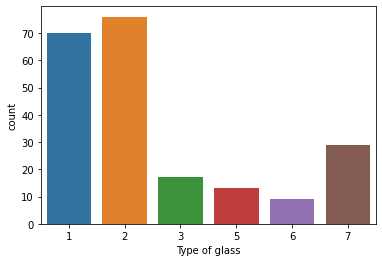

In [6]:
sns.countplot(x = "Type of glass", data = data)

# INFORMATIONS 

In [7]:
data.shape # no.of rows and cols present in the dataset

(214, 11)

In [8]:
data.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
data.info() # displays the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [10]:
data.isnull().sum() # checks for null values

ID               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

# PLOTTING 

<AxesSubplot:ylabel='Count'>

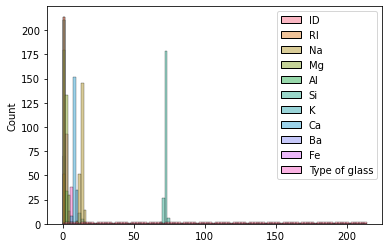

In [11]:
sns.histplot(data)

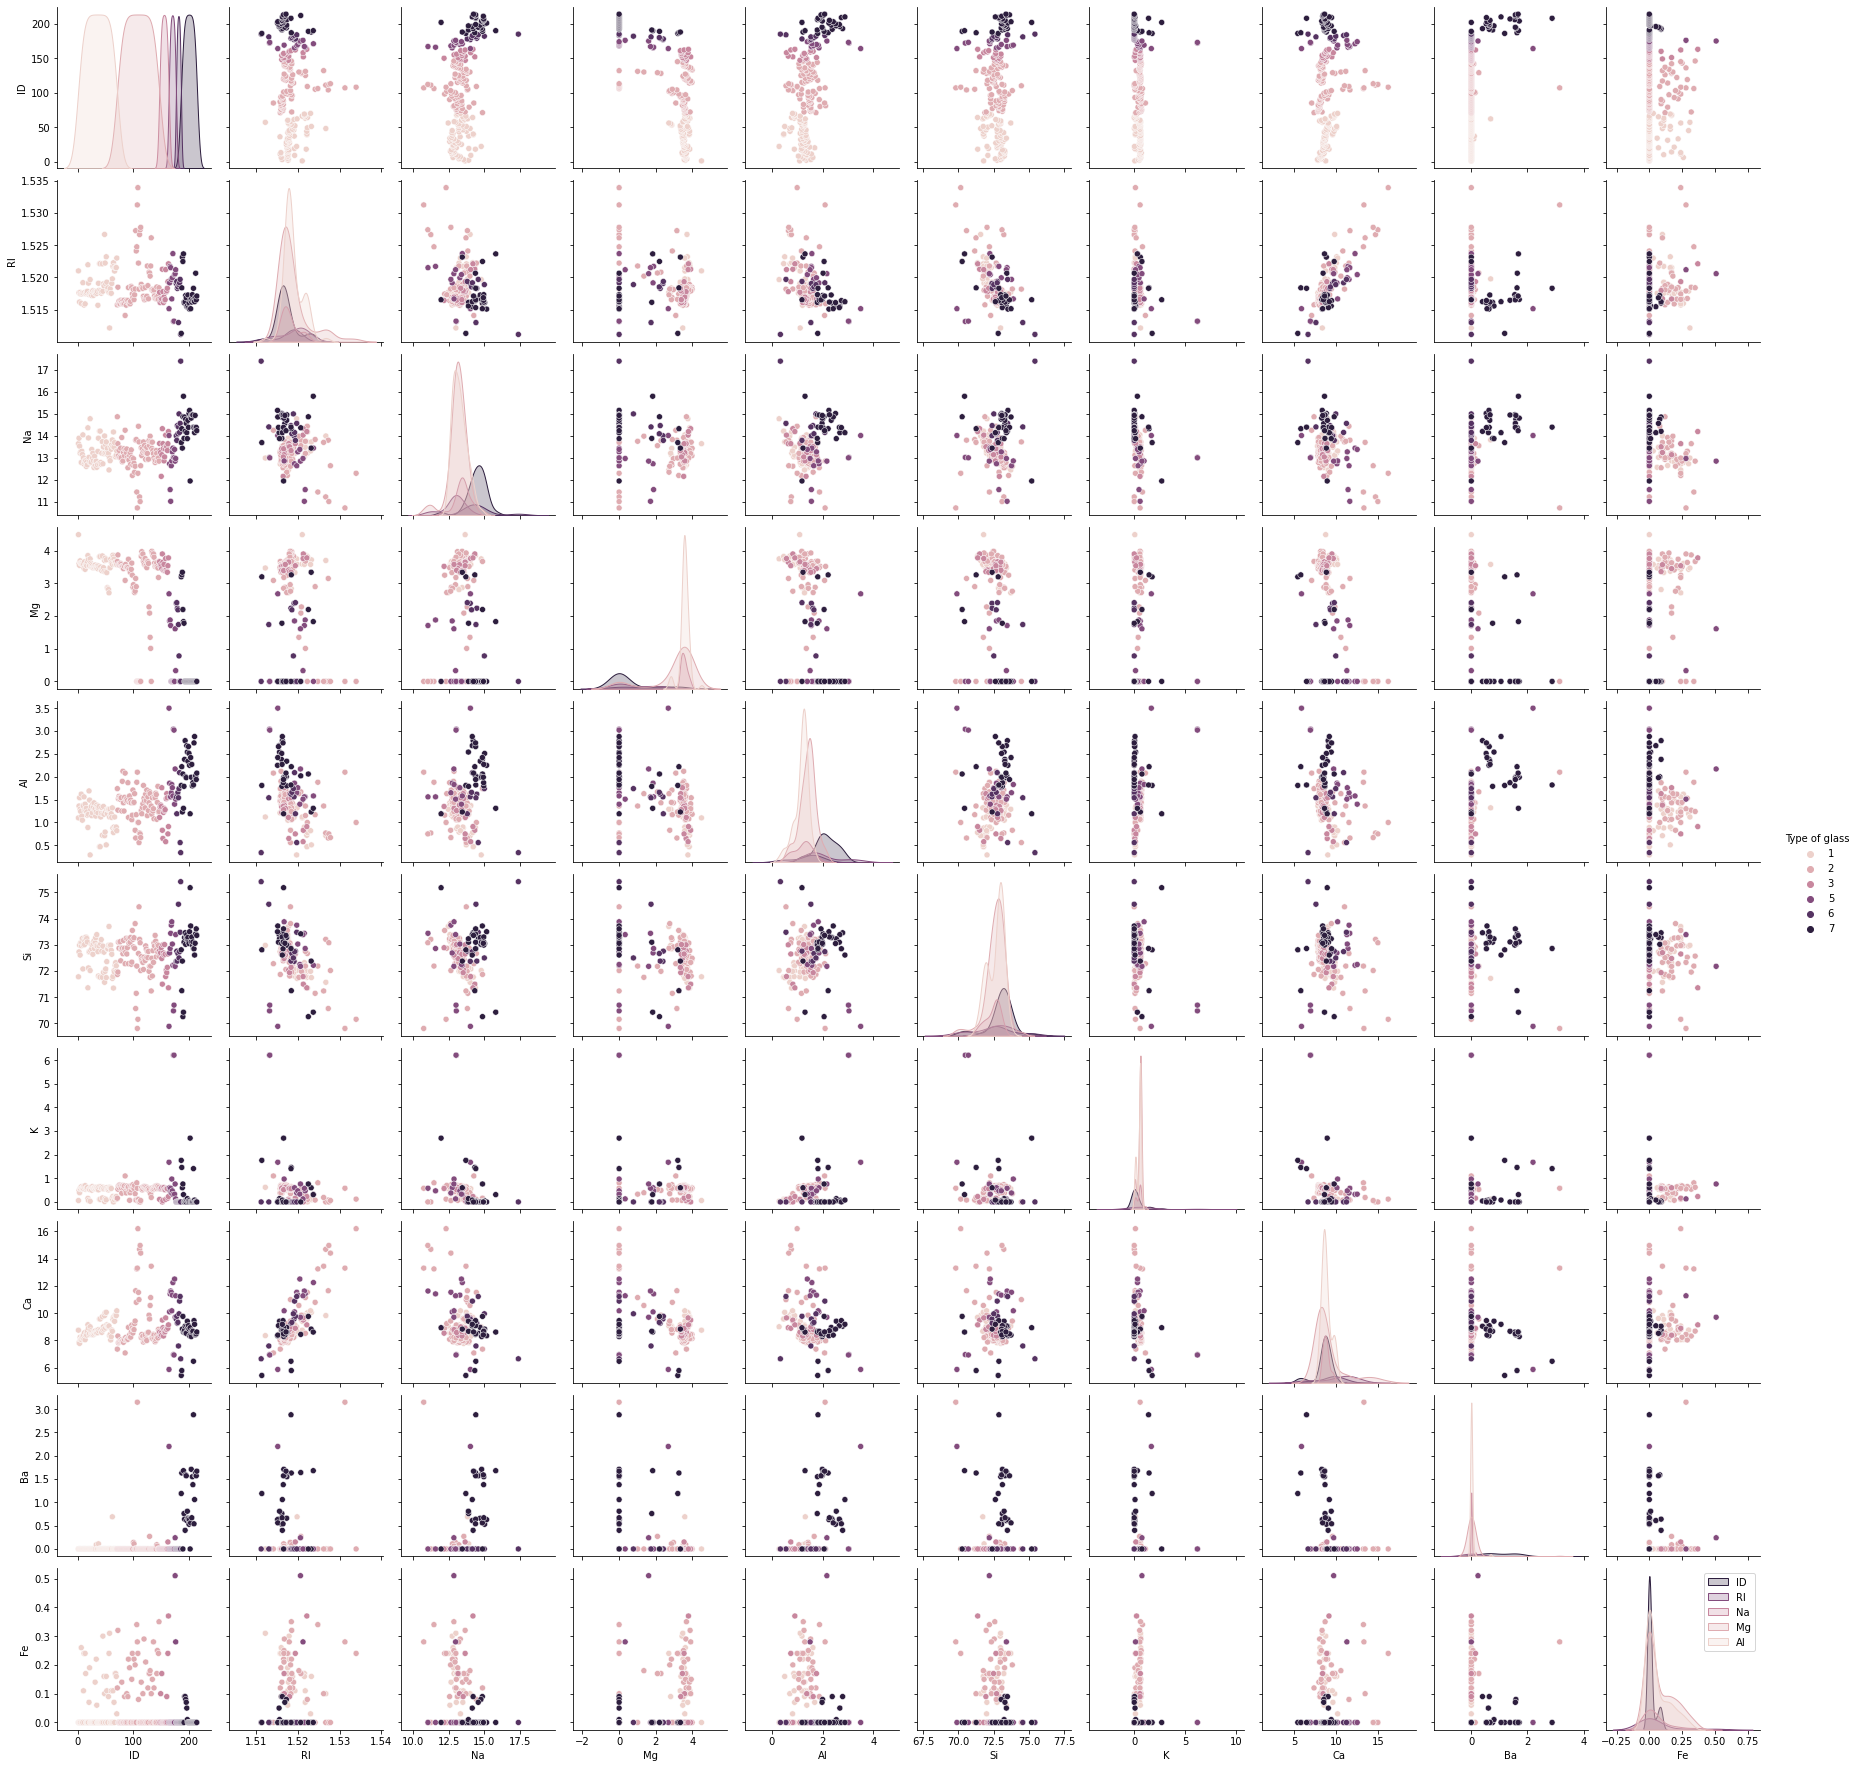

In [12]:
sns.pairplot(data, hue = "Type of glass")
plt.legend(data)
plt.show()

# MODEL SELECTION AND DATA SPLITTING

Train and Testing 2 parameters : data(attributes) and label(type of glass)

To train and test split we need 4 varaiables 

let the 4 variables be x_train , x_test , y_train , y_test. 

In [13]:
from sklearn.model_selection import train_test_split 
x = data.drop(['Type of glass'] , axis = 1)
y = data['Type of glass']
x_train, x_test, y_train, y_test = train_test_split(x,y , train_size = .8, test_size = .2, random_state = 35)

# RANDOMFOREST ALGORITHM

In [14]:
# using random forest algo

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

Text(33.0, 0.5, 'Actual Label')

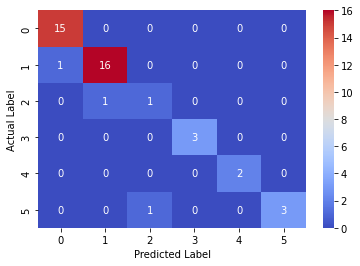

In [16]:
model = RandomForestClassifier(n_estimators=42, random_state = 60)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# PREDICTION ACCURACY AND CONFUSION MATRIX

In [17]:
acc = accuracy_score(y_test, predictions)
print(acc)
print('Percentage of Accuracy : ',acc*100,'%')

0.9302325581395349
Percentage of Accuracy :  93.02325581395348 %


In [18]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix is : \n ",cm)

Confusion Matrix is : 
  [[15  0  0  0  0  0]
 [ 1 16  0  0  0  0]
 [ 0  1  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  1  0  0  3]]


# DECISION TREE ALGORITHM

In [19]:
# using Decision tree algo
#importing lib

# IMPORTING REQUIRED LIBRARIES

In [20]:
import warnings
warnings.filterwarnings('ignore') # controls the warnings and check warninga are ignored
from scipy import stats # used to generate continous random numbers
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [21]:
data = pd.read_csv("glass-identification.csv") # read the data

# DATA UPDATING AND LOADING

In [22]:
print(data.head()) # display the data
print("")
print("shape : ",data.shape) # display the no.of rows and cols as shape

   ID       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type of glass
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0              1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0              1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0              1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0              1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0              1

shape :  (214, 11)


In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None


In [24]:
data['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

# PIECHART 

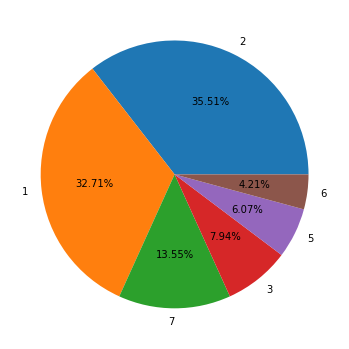

In [25]:
plt.figure(figsize=(6, 8))
plt.pie(data['Type of glass'].value_counts().values, labels= data['Type of glass'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [26]:
num_cols=data._get_numeric_data().columns
print(num_cols)

Index(['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


# PLOTTING- DISTRIBUTION OF VALUES TO THE VARIABLES

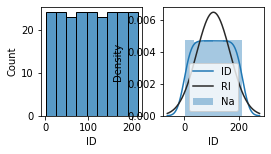

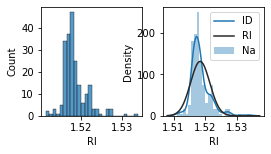

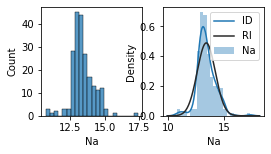

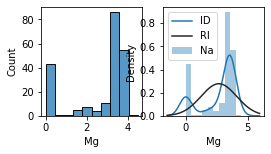

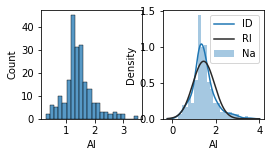

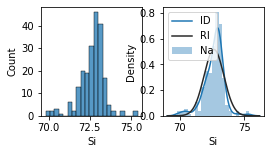

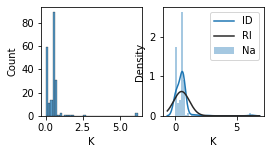

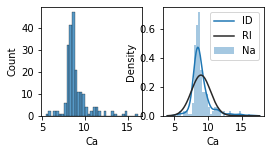

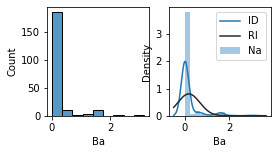

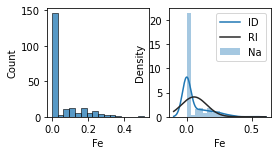

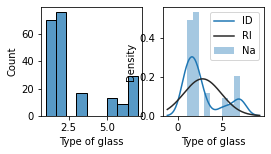

In [27]:
for col in num_cols:
    fig, axes=plt.subplots(figsize=(4,2),nrows=1, ncols=2)
    sns.histplot(data[col],ax=axes[0])
    sns.distplot(data[col], ax=axes[1], fit=stats.norm)
    plt.legend(data)
    plt.show()

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


# DATA CORRELATION  HEADMAP

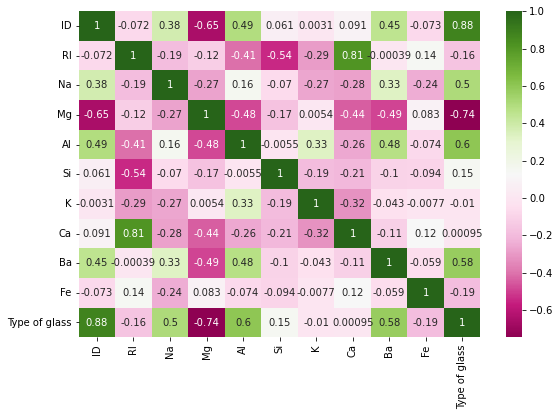

In [29]:
# uses the relationship between two variables for prediction.
cor = data.corr()
plt.figure(figsize=(9,6))
sns.heatmap(data = cor, annot = True, cmap = 'PiYG')
plt.show()

# DATA SPLITTING 

In [30]:
columns=list(data.columns)
columns.remove('Type of glass')
X=data.drop('Type of glass', axis=1)
Y=data['Type of glass']

In [31]:
# Split data into separate training and test set
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.20, random_state=42)

In [32]:
# training the data
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train, columns=columns)
X_test=pd.DataFrame(X_test, columns=columns)

In [33]:
dt_gini=DecisionTreeClassifier(criterion='gini') # using gini index its is a criteria for bulding decision tree
dt_gini.fit(X_train, Y_train)

DecisionTreeClassifier()

# DECISION TREE FOR THE DATA

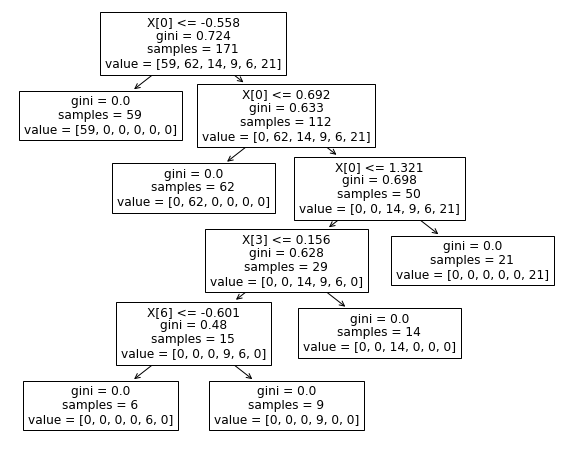

In [34]:
plt.figure(figsize=(10,8))
tree.plot_tree(dt_gini.fit(X_train, Y_train))
plt.show()

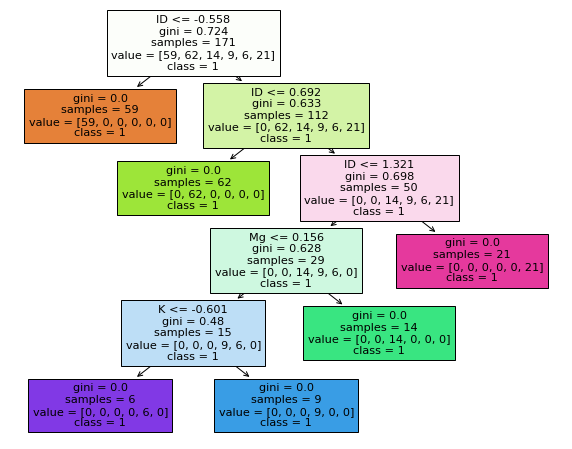

In [35]:
fig = plt.figure(figsize=(10,8))
_ = tree.plot_tree(dt_gini,feature_names=X.columns,class_names=Y_train.astype(str),filled=True)

# PREDICTION ACCURACY  AND CONFUSION MATRIX

In [36]:
Y_train_pred=dt_gini.predict(X_train)
Y_test_pred=dt_gini.predict(X_test)
acc = accuracy_score(Y_test, Y_test_pred)
print('Accuracy : ',acc)
print('Percentage of Accuracy : ',acc*100,'%')

Accuracy :  0.9534883720930233
Percentage of Accuracy :  95.34883720930233 %


In [37]:
cm = confusion_matrix(Y_test, predictions)
print("Confusion Matrrix is : \n",cm)

Confusion Matrrix is : 
 [[4 5 1 0 1 0]
 [5 7 0 2 0 0]
 [2 1 0 0 0 0]
 [2 2 0 0 0 0]
 [1 2 0 0 0 0]
 [2 0 1 1 1 3]]


# REPORT

In [38]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        14
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        21

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



In [39]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         3
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         8

    accuracy                           0.95        43
   macro avg       0.95      0.94      0.94        43
weighted avg       0.96      0.95      0.95        43



# MODEL DEPLOYMENT USING STREAMLIT

STREAMLIT helps to create web app for machine learning models in simple terms model deployment

In [40]:
#saving the model before deploying
import pickle 
pickle_out = open("glass.pkl", mode = "wb") # opening a pickle file
pickle.dump(model,pickle_out) # dumping the model in the created pickle file
pickle_out.close()

In [41]:
!pip install streamlit

In [42]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

In [43]:
%%writefile app.py
#load the model
filename = 'glass.pkl'
loaded_model = pickle.load(open(filename, 'rb'))

Writing app.py


In [44]:
import warnings
warnings.filterwarnings('ignore')
import streamlit as st
from sklearn.ensemble import RandomForestClassifier

In [45]:
st.write("""
# Simple Glass Identification Prediction App
This app predicts the **Type of Glass** type !
""")

2022-10-22 11:54:55.202 
  command:

    streamlit run C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [46]:
st.sidebar.header('User Input Parameters')
columns = ['Id','RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe','Type']

In [47]:
def user_input_features():
    RI = st.sidebar.slider('Refractive Index',1.51,1.53,1.51)
    Na = st.sidebar.slider('Sodium',2.0,4.4,3.4)
    Mg = st.sidebar.slider('Magnesium',10.0,17.6,10.730)
    Ai = st.sidebar.slider('Aluminium',2.0,4.9,2.115000)
    Si = st.sidebar.slider('Sillicon',72.0,75.0,72.280)
    K = st.sidebar.slider('Potassium',0.12,6.2,0.122500)
    Ca = st.sidebar.slider('Calcium',8.24,16.19,8.24)
    Ba = st.sidebar.slider('Barium',0.0,3.15,0.0)
    Fe = st.sidebar.slider('Iron',0.0,0.51,0.2)
    data = {'RI': RI,
            'Na': Na,
            'Mg':Mg,
            'Ai':Ai,
            'Si':Si,
            'K':K,
            'Ca':Ca,
            'Ba':Ba,
            'Fe':Fe
            }
    features = pd.DataFrame(data,index=[0])
    return features

In [48]:
df = user_input_features()
st.subheader('User Input Parameters')
st.write(df)

In [49]:
test = df.copy()

In [50]:
st.subheader('Types of Glass along with Type Number')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [51]:
Type_name = np.array(['building_windows_float_processed',
'building_windows_non_float_processed','vehicle_windows_float_',
'vehicle_windows_non_float_processed','containers',
'tableware','headlamps'])
st.write(Type_name)

In [52]:
# types -dictionary
names ={1:'building_windows_float_processed',
2: 'building_windows_non_float_processed',
3: 'vehicle_windows_float_processed',
4: 'vehicle_windows_non_float_processed',
5:'containers',
6: 'tableware',
7:'headlamps'}

In [53]:
st.subheader('Prediction')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [54]:
def prediction(RI, Na, Mg, Al, Si, K, Ca, Ba, Fe):
 prediction = loaded_model.predict(test)
 result = prediction(test)
 names = result[0]
st.write(names)

In [55]:
#to run the streamlit app

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!streamlit run app.py 

In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect('8501')
print("URL :  ", public_url)